## This script contains the following:

1.Importing libraries and data and renaming columns  
2.Standadizing the data  
3.The elbow technique  
4.k-means clustering

### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# create a path
path = r'C:\Users\supri\Desktop\Supriya\DataAnalysis\Project\Data Immersion\Achievement 1-2\Boat_Sales'

In [4]:
# load data
df_boat = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'boat_data_sales_cleaned2.csv'), index_col = 0)

In [5]:
df_boat.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR Price,Country1,City1,Type_split,Fuel,Price_Category
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,BÃ¶nningstedt,new boat from stock,Unleaded,Low-priced
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,Bayern,new boat from stock,Unleaded,Low-priced
10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3570.0,Switzerland,Seengen,Used boat,Electric,Low-priced
12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.0,Italy,Lake Garda,Used boat,Unleaded,Low-priced
13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4692.0,Switzerland,Zugersee,new boat from stock,Unleaded,Low-priced


### Data Cleaning

In [6]:
# Rename the columns.
df_boat.rename(columns = {'Number of views last 7 days':'Views_7days'}, inplace = True)

In [7]:
df1 = df_boat[['Length','Width','Views_7days','EUR Price', 'Year Built']]

In [8]:
df1.head()

,Length,Width,Views_7days,EUR Price,Year Built
1,4.00,1.50,75,3490.0,2020
4,3.55,1.46,58,3399.0,2019
10,4.35,1.75,239,3570.0,1987
12,4.70,2.00,69,3500.0,2004
13,4.40,1.65,113,4692.0,2020


### 2. Standadizing the data

In [9]:
# standazing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df1)
print(standardized_data)

[[-1.39700505 -1.76350239 -0.50824611 -0.3754033   1.04815553]
 [-1.48360769 -1.79909846 -0.60796204 -0.37552996  0.96900625]
 [-1.32964744 -1.54102691  0.45371932 -0.37529195 -1.56377091]
 ...
 [-1.01210444 -1.65671416  0.74113583 -0.3732334  -1.80121877]
 [-1.32002493 -1.49653181  1.12826826 -0.37399892  1.04815553]
 [-1.47398517 -1.67451219  0.18976539 -0.37489444  0.96900625]]


In [10]:
# coverting to dataframe
df1 = pd.DataFrame(standardized_data, columns=df1.columns)
print(df1)

        Length     Width  Views_7days  EUR Price  Year Built
0    -1.397005 -1.763502    -0.508246  -0.375403    1.048156
1    -1.483608 -1.799098    -0.607962  -0.375530    0.969006
2    -1.329647 -1.541027     0.453719  -0.375292   -1.563771
3    -1.262290 -1.318551    -0.543440  -0.375389   -0.218233
4    -1.320025 -1.630017    -0.285352  -0.373730    1.048156
...        ...       ...          ...        ...         ...
6631 -0.781164 -0.695620     6.671301  -0.373162   -2.592712
6632 -1.012104 -1.229561    10.296268  -0.373164   -2.117816
6633 -1.012104 -1.656714     0.741136  -0.373233   -1.801219
6634 -1.320025 -1.496532     1.128268  -0.373999    1.048156
6635 -1.473985 -1.674512     0.189765  -0.374894    0.969006

[6636 rows x 5 columns]


### 3. The elbow technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-33180.00000000001,
 -27698.756602114387,
 -19304.741282782954,
 -14885.291766050703,
 -12421.737682643521,
 -10455.486526715045,
 -9616.45983887399,
 -9020.681859967972,
 -8014.33609601054]

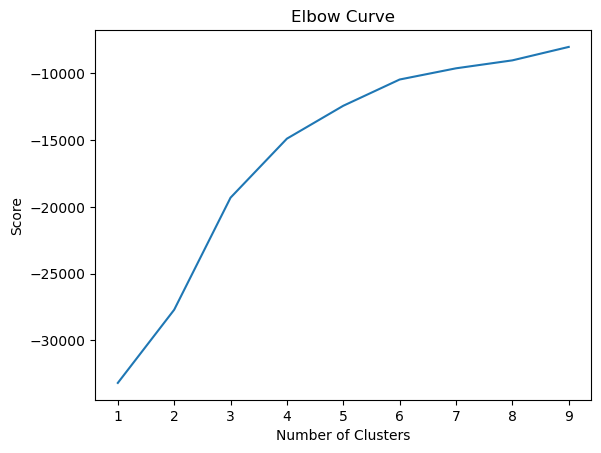

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### The is a noticable straighten line on the x-axis after 5. Therefore, the optimal count for clusters is five.

### 4. k-means clustering

In [14]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 5) 

In [15]:
# Fit the k-means object to the data.
kmeans.fit(df1)

KMeans(n_clusters=5)

In [16]:
df1['clusters'] = kmeans.fit_predict(df1)

In [17]:
df1.head()

,Length,Width,Views_7days,EUR Price,Year Built,clusters
0,-1.397005,-1.763502,-0.508246,-0.375403,1.048156,1
1,-1.483608,-1.799098,-0.607962,-0.375530,0.969006,1
2,-1.329647,-1.541027,0.453719,-0.375292,-1.563771,3
3,-1.262290,-1.318551,-0.543440,-0.375389,-0.218233,1
4,-1.320025,-1.630017,-0.285352,-0.373730,1.048156,1


In [18]:
df1['clusters'].value_counts()

clusters
1    2599
0    2414
3     939
4     638
2      46
Name: count, dtype: int64

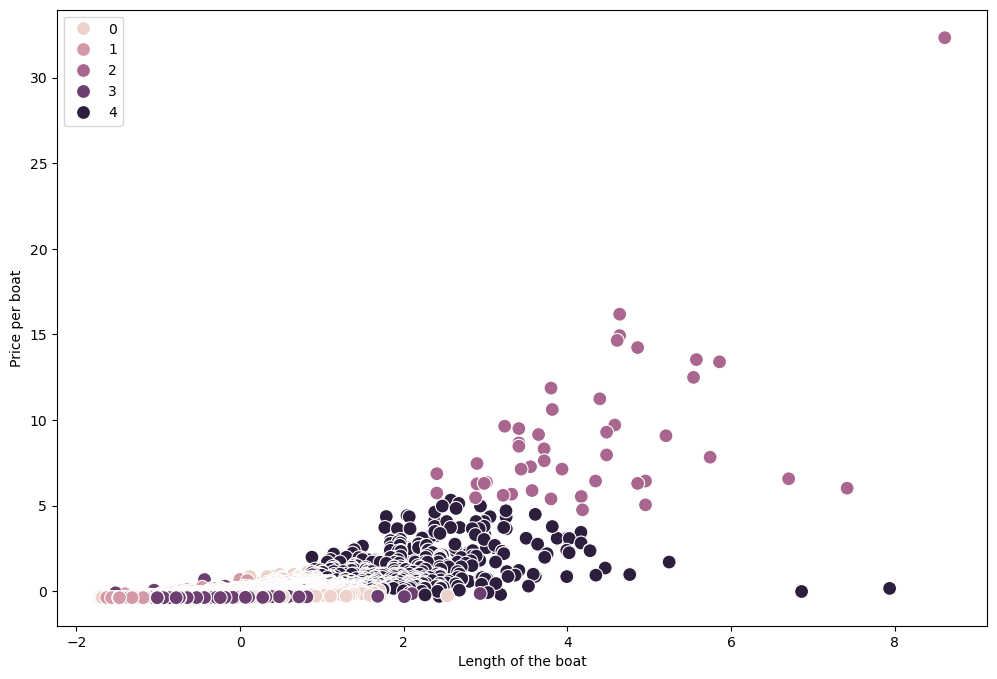

In [19]:
# Plot the clusters for the "EUR_price" and "Length" variables.

plt.figure(figsize=(12,8))
Scatter_LengthPrice = sns.scatterplot(x=df1['Length'], y=df1['EUR Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

Scatter_LengthPrice.grid(False) # This removes the grid from the background.
plt.xlabel('Length of the boat') # Label x-axis.
plt.ylabel('Price per boat') # Label y-axis.
plt.show()

In [20]:
# Plot the clusters for the "Views_7days" and "EUR_price" variables.

plt.figure(figsize=(12,8))
Scatter_View7daysPrice = sns.scatterplot(x=df1['Views_7days'], y=df1['EUR Price'], hue=kmeans.labels_, s=100)

Scatter_View7daysPrice.grid(False) 
plt.xlabel('Views_7days') 
plt.ylabel('EUR Price') 
plt.show()

NameError: name 'ax' is not defined

In [ ]:
# Plot the clusters for the  Euro Price and Year of built.

plt.figure(figsize=(12,8))
Scatter_YearBuilt_Price = sns.scatterplot(x=df1['Year Built'], y=df1['EUR Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

Scatter_YearBuilt_Price.grid(False) # This removes the grid from the background.
plt.xlabel('Year Built') # Label x-axis.
plt.ylabel('EUR Price') # Label y-axis.
plt.show()

### Explaining the graph

##### The two graphs do not provide strong insights into the relationship between the cost of the boat and its length or the number of views. This suggests that boat price is likely influenced by a combination of multiple factors, and that length or views alone are insufficient to explain price variations. Other key factors such as boat type, brand, condition are likely playing a significant role in the overall pricing.

In [ ]:
df1.loc[df1['clusters'] == 4, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 3, 'cluster'] = 'dent purple'
df1.loc[df1['clusters'] == 2, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'whitish purple'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'whitish pink'

In [ ]:
df1.groupby('cluster').agg({'Length':['mean', 'median'], 
                         'Width':['mean', 'median'], 
                         'Views_7days':['mean', 'median'],
                          'EUR Price':['mean', 'median'],
                          'Year Built':['mean', 'median']})

### Explanations

The clustering shows that smaller, newer boats receive fewer views and lower prices, maybe less interest. Larger but less costly boats  also attract less interest. Mainly, older, smaller boats  receive the most views, possibly due to affordability. The large, relatively new, and high priced boats attract the most buyer interest, showing demand for premium vessels.

In [ ]:
Scatter_LengthPrice.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Scatterplot_Length_Price.png'))
Scatter_View7daysPrice.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Scatterplot_Views7Days_Price.png'))
Scatter_YearBuilt_Price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Scatterplot_YearBuilt_Price.png'))

In [ ]:
# Exporting df
df1.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clusters.csv'))